### Practical Statistics for Data Scientists

### capitulo 2 ---> Distribuciones de datos y muestreo

Dataset de pronostico del incumplimiento de prestamos

#### Distribucion de datos y muestreo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

from sklearn.utils import resample
from scipy import stats

In [2]:
prestamos = pd.read_csv('data/loans_income.csv').squeeze('columns')

In [3]:
prestamos.head()

0     67000
1     52000
2    100000
3     78762
4     37041
Name: x, dtype: int64

In [4]:
#primera muestra de 1000 valores
sample_data = pd.DataFrame({
    'Ingreso': prestamos.sample(1000),
    'Tipo': 'Datos',
})

# segunda muestra de 1000 medias de 5 valores
sample_mean_05 = pd.DataFrame({
    'Ingreso': [prestamos.sample(5).mean() for _ in range(1000)],
    'Tipo': 'Media de 5',
})

# Tercera muestra de 1000 medias de 20 valores
sample_mean_20 = pd.DataFrame({
    'Ingreso': [prestamos.sample(20).mean() for _ in range(1000)],
    'Tipo': 'Media de 20',
})

# se concatenan las muestras para poder ser graficadas
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
results.head()

,Ingreso,Tipo
22300,110000.0,Datos
43397,140000.0,Datos
45852,30000.0,Datos
42385,94000.0,Datos
44730,102050.0,Datos


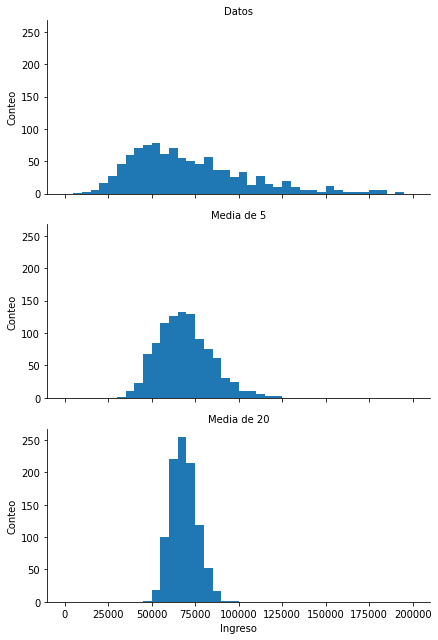

In [5]:
#se grafica el dataset que contien el muestreo previamente descrito
g = sns.FacetGrid(results, col='Tipo', col_wrap=1, 
                  height=3, aspect=2)
g.map(plt.hist, 'Ingreso', range=[0, 200000], bins=40)
g.set_axis_labels('Ingreso', 'Conteo')
g.set_titles('{col_name}')

- el primer histograma esta ampliamente distribuido y a su vez tiene los datos segasdos hacia la derecha en donde se encuentran los valores mas altos ( aqui podemos ver el comportamiento de la distribucion de datos)
- los dos ultimos histogramas tienen los datos mas compactos y tienden a tener forma de campana ( aqui podemos ver el comportamiento de la distribucion muestral)

#### Bootstrap

In [6]:
resultados = []
for nrepeat in range(1000):
    sample = resample(prestamos)
    resultados.append(sample.median())
resultados = pd.Series(resultados)
print(f'Original: {prestamos.median()}')
print(f'Bias: {resultados.mean() -prestamos.median()}')
print(f'std error: {resultados.std()}')

Original: 62000.0
Bias: -70.06450000000041
std error: 202.97935537501832


la estimacion original de la mediana es de 62.000, la distribucion Bootstrap indica que la estimacion tiene un sesgo de -82 y un error estandar de 231

#### Distribucion normal
##### Diagramas QQ

Text(0.5, 1.0, 'Diagrama QQ de una muestra de 100 valores extraidos de una distribucion normal estandar')

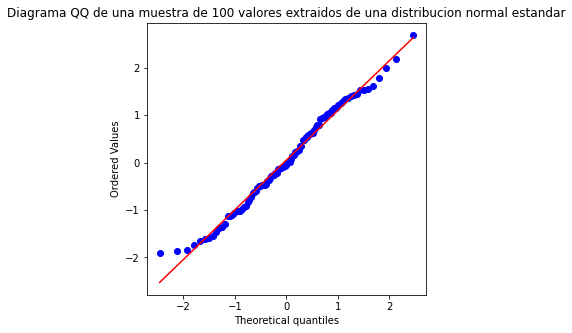

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot = ax)
ax.set_title("Diagrama QQ de una muestra de 100 valores extraidos de una distribucion normal estandar")

En el eje y tenemos la puntuazion z y en el eje x el cuantil de la distribucion normal, vemos que los puntos caen aproximadamente en la linea diagonal cual siginifica que la distribucion de la muestra se puede considerar cercana a la normal

#### Distribuciones de Cola Larga (sesgados o asimetricos)

Text(0.5, 1.0, 'Diagrama QQ de las rentabilidades d Netflix (NFLX)')

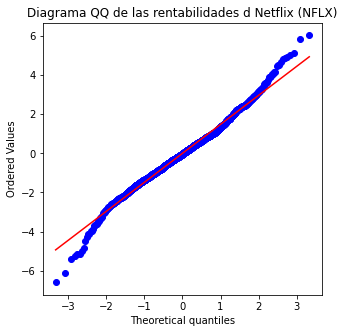

In [8]:
sp500_px = pd.read_csv('data/sp500_data.csv.gz')
nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))
fig, ax = plt.subplots(figsize=(5,5))
stats.probplot(nflx, plot = ax)

ax.set_title("Diagrama QQ de las rentabilidades d Netflix (NFLX)")

* los puntos estan muy por debajo de la linea para valores bajos y muy por encima para valores altos, lo que indica que los datos no estan distribuidos normalmente
* eso significa que es mucho mas probable que se observen valores extremos

### Distribucion binomial

In [9]:
stats.binom.pmf(2, n=5, p=0.1)

0.0729

In [10]:
stats.binom.cdf(2, n=5, p=0.1)

0.99144

la probabilidad de observar 2 o menos exitos en 5 ensayos, donde la probabilidad de exito para cada ensayo es de 0.1

### Distribucion de poisson

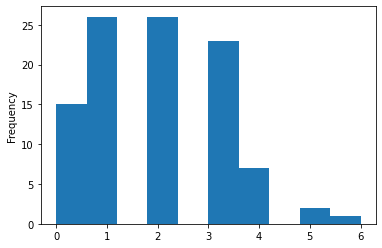

In [11]:
sample=stats.poisson.rvs(2, size=100)

pd.Series(sample).plot.hist()
plt.show()

se generan 100 numeros aleatorios apartir de la distribucion de poisson con un lambda de 2 (numero medio de eventos que ocurren en un intervalo de tiempo o espacio especifico)
ej: si el promedio de llamadas entrantes de servicio al cliente es de 2 por minutos, este codigo simulara 100 minutos, porporcionando el resultado de la cantidad de llamadas en cada uno de esos 100 minutos

### Distribucion exponencial

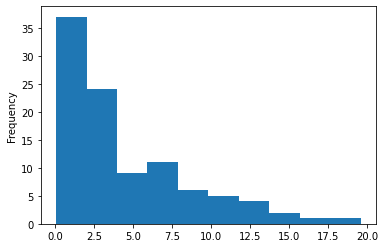

In [12]:
sample_expo=stats.expon.rvs(scale=5, size=100)

pd.Series(sample_expo).plot.hist()
plt.show()

se generan 100 numeros aleatorios apartir de la distribucion exponencial, donde el numero medio de eventos por periodo de tiempo es de 5, por lo tanto, podriamos usarlo para simular 100 intervalos, en minutos, entre llamadas de servicio, donde la tasa promedio de llamadas entrantes es de 5 por minutos

### Distribucion de Weibull

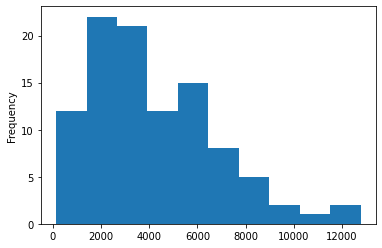

In [13]:
sample_weibull=stats.weibull_min.rvs(1.5, scale = 5000, size=100)

pd.Series(sample_weibull).plot.hist()
plt.show()

el anterior codigo genera 100 numeros aleatorios (vida utiles) a partir de una distribucion de weibull con unparametro de forma de 1.5 y vida caractetistica de 5000